In [3]:
#Set number of Na atoms, timesteps and extract lines with Na

step_count = []
na = []

with open('outputs/na_traj_schottky.txt') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('outputs/na_traj_schottky.txt') as file:
    content = file.readlines()
for line in content:
    if '1 1.0' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

#Sort out coordinates by dimension        
        
na_coords = [[] for x in range(0, na_atoms)]
na_coords_split = [[] for x in range(0, na_atoms)]
na_coords_x = [[] for x in range(0, na_atoms)]
na_coords_y = [[] for x in range(0, na_atoms)]
na_coords_z = [[] for x in range(0, na_atoms)]
    
for n in range(0, na_atoms):
    for i in range (n, steps * na_atoms, na_atoms):
        na_coords[n].append(na[i])
    for i in na_coords[n]:
        na_coords_split[n].append(i.split())
    for i in range(0, steps):
        na_coords_x[n].append(float(na_coords_split[n][i][2]))
    for i in range(0, steps):
        na_coords_y[n].append(float(na_coords_split[n][i][3]))
    for i in range(0, steps):
        na_coords_z[n].append(float(na_coords_split[n][i][4]))

#Create list within list with cumulative msd for each Na atom        
        
na_msd = [[] for x in range(0, na_atoms)]

for n in range(0, na_atoms):
    initial = 0
    for t in range(0, (steps-1)):
        step = (na_coords_x[n][t] - na_coords_x[n][0])**2 + (na_coords_y[n][t] - na_coords_y[n][0])**2 + (na_coords_z[n][t] - na_coords_z[n][0])**2
        na_msd[n].append(step)

#Create list with sum of msd for Na atoms        
        
na_total_msd = []

for t in range(0, (steps-1)):
    initial = 0
    for n in range (0, na_atoms):
        msdt = na_msd[n][t] + initial
        initial = msdt
    na_total_msd.append(msdt)

#Create list with cumulative msd for a single Na atom on average    
    
na_mean_msd = []

for i in na_total_msd:
    na_mean_msd.append(i/na_atoms)

In [6]:
#Set number of Na atoms, timesteps and extract lines with Na

step_count = []
na = []

with open('outputs/na_traj_mg.txt') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('outputs/na_traj_mg.txt') as file:
    content = file.readlines()
for line in content:
    if '2 1.0' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

#Sort out coordinates by dimension        
        
na_coords = [[] for x in range(0, na_atoms)]
na_coords_split = [[] for x in range(0, na_atoms)]
na_coords_x = [[] for x in range(0, na_atoms)]
na_coords_y = [[] for x in range(0, na_atoms)]
na_coords_z = [[] for x in range(0, na_atoms)]
    
for n in range(0, na_atoms):
    for i in range (n, steps * na_atoms, na_atoms):
        na_coords[n].append(na[i])
    for i in na_coords[n]:
        na_coords_split[n].append(i.split())
    for i in range(0, steps):
        na_coords_x[n].append(float(na_coords_split[n][i][2]))
    for i in range(0, steps):
        na_coords_y[n].append(float(na_coords_split[n][i][3]))
    for i in range(0, steps):
        na_coords_z[n].append(float(na_coords_split[n][i][4]))

#Create list within list with cumulative msd for each Na atom        
        
na_msd = [[] for x in range(0, na_atoms)]

for n in range(0, na_atoms):
    initial = 0
    for t in range(0, (steps-1)):
        step = (na_coords_x[n][t] - na_coords_x[n][0])**2 + (na_coords_y[n][t] - na_coords_y[n][0])**2 + (na_coords_z[n][t] - na_coords_z[n][0])**2
        na_msd[n].append(step)

#Create list with cumulative msd for all Na atoms         
        
na_total_msd = []

for t in range(0, (steps-1)):
    initial = 0
    for n in range (0, na_atoms):
        msdt = na_msd[n][t] + initial
        initial = msdt
    na_total_msd.append(msdt)

#Create list with cumulative msd for a single Na atom on average    
    
ca_mean_msd = []

for i in na_total_msd:
    ca_mean_msd.append(i/na_atoms)

Text(0.5, 1.0, 'MSD in 3x3x3 Na3OCl supercell \n with 3 vacant sites at 800 K over 2000 ps')

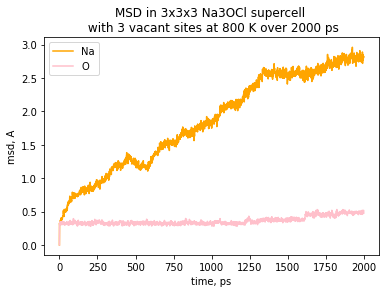

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(0, 2000), na_mean_msd, color='orange')
plt.plot(range(0, 2000), ca_mean_msd, color='pink')
plt.xlabel('time, ps')
plt.ylabel('msd, A')
plt.legend(labels=['Na', 'O', 'Cl'], loc='upper left')
plt.title('MSD in 3x3x3 Na3OCl supercell \n with 3 vacant sites at 800 K over 2000 ps')

In [22]:
len(na_msd[0])

2000